##  Lab 3(a) - Implementation of Multi layer perceptron from scratch
##  Weightage - 2.4%

Maximum Points in the Lab: 90

---
Important points to remember :


1.  Observations for the experiments should be explained.
2. All the code should be submitted in the form of a single Jupyter notebook itself.
3. Points for each sub-section are mentioned in the appropriate question.
4. Make sure to begin early as a few experiments may consume more time to run.
5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Hence use self explanatory variable names and add comments to describe your approach wherever necessary.
8. You are expected to submit your **detailed inferences** and not just an error free code.
9. The lab is due on **March 20th 11.59pm**.
10. The lab should be completed **individually**. Students are expected to follow the **honor code** of the class.

For any doubts regarding lab please mail to 2018csm1011@iitrpr.ac.in


Below is the multi layer perceptron architechture used for implementation. Notations of the neural network are mentioned below :

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
cd drive/My\ Drive/lab3

/content/drive/My Drive/lab3


In [8]:
ls

data.txt  HERSH_DHILLON_lab_3a.ipynb  label.txt
figures/  HERSH_DHILLON_lab_3b.ipynb  pictures/


![MLP implementation diagram](pictures/mlp.png)


## Implementation details :

1) In this lab you will be using MLP for classifying MNIST digits. a. Let us consider a MLP network with H hidden units, O outputs, and
inputs of size D.

2) According to above diagram dimensions of network will be :
```
 W - H * D+1   -- Weights from Input layer to Hidden layer
 V - K * H+1   -- Weights from Hidden layer to Output layer
 X - N * D+1   -- Weights of Input data
 Y - N * K     -- Weights of Output label data
 Z - H+1 * 1   -- Hidden layer Weights
 O - K * 1     -- Output layer weights
```
3) Please note that +1 in above notations is to indicate bias term.

4) tanh is used as the activation function.

5) During forward pass will be :

$\mathbf{z}=\tanh (\mathbf{W} \mathbf{x})$

and $O_{i}=\frac{\exp v_{i}^{T} z}{\sum_{k=1}^{K} \exp v_{k}^{T} z}$

Overall loss function will be :

Total loss = $-\sum_{n=1}^{N} \sum_{i=1}^{K} y_{n i} \log O_{n i}$




6) The dataset is included in zip file ("data.txt" and "label.txt"). Number of hidden layer units to be 500, learning rate is set to be 0.01. 

7) Inorder to update the weights during back propogation we will modified version of stochastic gradient descent, where instead of updating weights after each data point, the updates are made once with batch of input data, Let batch size = 25. Number of epochs = 100.

8) Divide the data into train, validation, and test splits using a preset ratio. Please define the ratio you are using.

9) Please plot the below : 

    i)  Training error, Validation error Vs epochs [average over 5 runs.]
  
    ii) Mean Training error Vs epochs [average over 5 runs.]
    
    iii)  Mean Validation error Vs epochs [average over 5 runs.]
  
    iv) Variance Training error Vs epochs [average over 5 runs.]
    
     v)  Variance validation error Vs epochs [average over 5 runs.]


# Note : 

1) All weight update equations during back propogation should be done using $\textbf{Matrix operations}$ only (not for loops).

 For example : 
 
![MLP implementation diagram](pictures/equation.png)





# Maximum points : 90 points.

1) Derive the weight update equation for W in form of Matrix operations similar to V matrix operations defined above.(write in the jupyter notebook itself using Latex or image) - 10 pts

2) Splitting train, validation and test using preset ratio - 5 pts

3) Random weights assign to W,V values -  5 pts.

4) During Forward pass :
   
       updating Z values - 5 pts.

       updating O values - 5 pts.

       Applying softmax values - 5pts.

       Calculating error values - 5pts.

5) During backward pass : ( only matrix operations allowed)
   
       Gradient between hidden to output - 10 pts.

       Gradient betweem input to hidden - 15 pts.
   
6) Using batch size = 25 to update weights - 5 pts.

7) averaging over 5 runs - 5 pts.

8) Please plot the below : - 10pts. 

    i)  Training error, Validation error Vs epochs [average over 5 runs.]
  
    ii) Mean Training error Vs epochs [average over 5 runs.]
    
    iii)  Mean Validation error Vs epochs [average over 5 runs.]
  
    iv) Variance Training error Vs epochs [average over 5 runs.]
    
     v)  Variance validation error Vs epochs [average over 5 runs.]   
     
9) Discuss the observations from above plots. - 5pts.

### Weight update equation for W

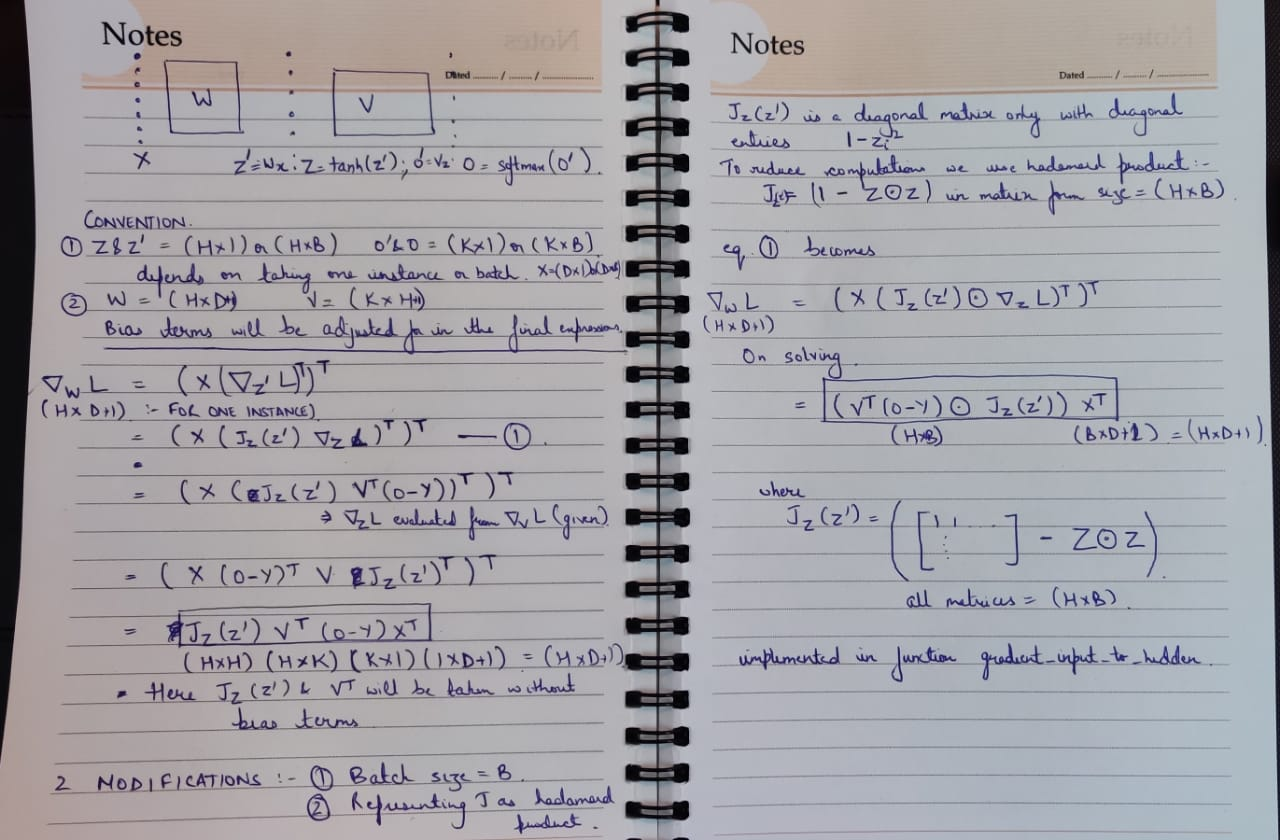

In [17]:
from IPython.display import Image
Image(filename='./pictures/derivation.jpeg') 

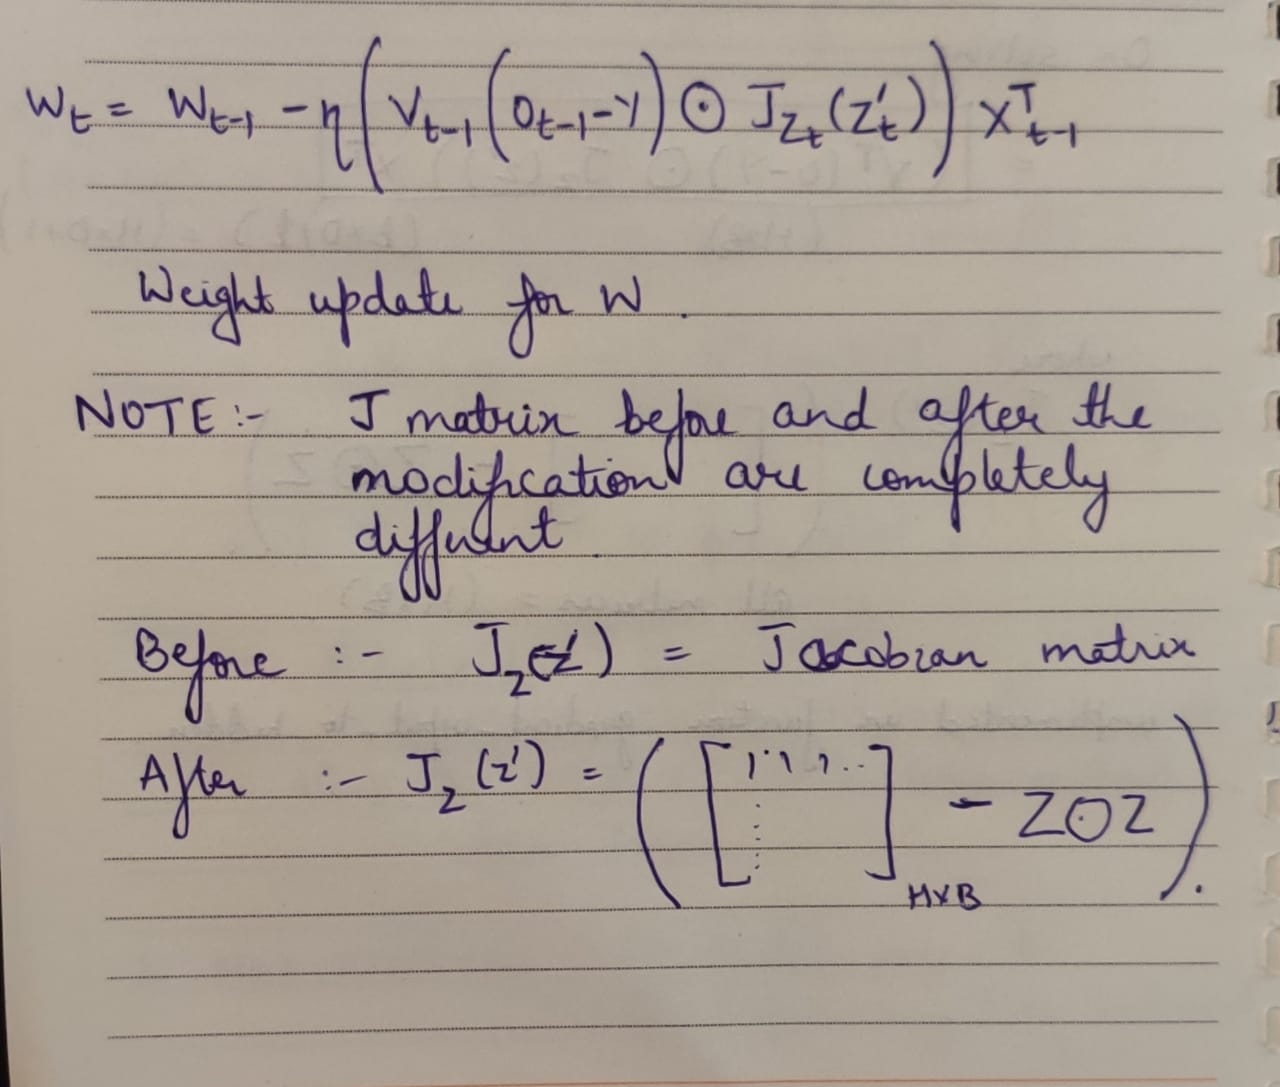

In [19]:
from IPython.display import Image
Image(filename='./pictures/final_equation.jpeg') 

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import random

####################################################################################
# Derivative of weights as defined in Lab3.a	####################################
####################################################################################
####################################################################################

# Dimension of all the Matrices Used
# W - H * D+1   -- Weights from Input layer to Hidden layer
# V - K * H+1   -- Weights from Hidden layer to Output layer
# X - N * D+1   -- Weights of Input data
# Y - N * K     -- Weights of Output label data
# Z - H+1 * 1   -- Hidden layer Weights
# O - K * 1     -- Output layer weights


# Function to read data and store it in form of 2D array
def read_data(file_name) :
    data = np.loadtxt(file_name, delimiter=',')
    return data


# Implementation of Forward pass function
def forward_pass(data_points,W,V,Y) :
    # use compute_Z_values, compute_O_values, compute_softmax, calculate_error to compute error, O_softmax
    # During forward pass compute Z values, O_values, O_softmax, error
    # Insert code here
    Z = compute_Z_values(W, data_points)
    batch_size = Z.shape[1]
    bias_z = np.empty(shape=(batch_size, 1))
    bias_z.fill(1.0)
    O = compute_O_values(V, np.concatenate((bias_z.T,Z),axis=0))
    O_softmax = compute_softmax(O)
    error = calculate_error(O_softmax, Y)

    #return the error, O_softmax
    return error,O_softmax


# Implementation of Cross Entropy Error Function takes as input O_softmax, Y
def calculate_error(predictions, targets, epsilon=1e-10):
    # Caculate cross entropy error between output of softmax (predictions) , actual values (targets)
    #Insert code here
    
    batch_size = targets.shape[0]
    cross_entropy_error = 0
    
    for i in range(batch_size):
        pred = predictions[i]
        target = targets[i]
        
        error = 0
        
        for j in range(10):
            error -= target[j]*np.log(pred[j])
            
        cross_entropy_error += error

    #returns cross entropy error
    return cross_entropy_error/batch_size


# Implementation of Softmax Error Function takes as input O
def compute_softmax(output_matrix) :
    # return output_matrix after apply softmax function ( hint: use np.exp function )
    y_length = 10
    #Insert code here
    
    batch_size = output_matrix.shape[0]
    
    softmax_matrix = np.zeros(output_matrix.shape)
    
    for i in range(batch_size):
        softmax_matrix[i, :] = np.exp(output_matrix[i, :])/(sum(np.exp(output_matrix[i, :])))

    # returns output_matrix
    return softmax_matrix


# Implementation of Backward pass using Backpropagation Algorithm to calculate V_new, W_new, bias_v
def backward_pass(O_softmax,Y,V,Z,W,X,bias_z):
    # use gradient_hidden_to_output, gradient_input_to_hidden functions to compute V_new, bias_v, W_new 
    #Insert code here
    
    V_new, bias_v = gradient_hidden_to_output(O_softmax, Y, Z, bias_z)
    W_new = gradient_input_to_hidden(O_softmax,Y,V,Z,X)

    #returns V_new, W_new, bias_v
    return  W_new,V_new,bias_v


#Implementation of Graident back propogation from Hidden to Input Layer
def gradient_hidden_to_output(O_softmax,Y,Z,bias_z) :
    # function to update V values using backpropogation using matrix operations.
    #Insert code here
    
    final_result_matrix = (O_softmax.T - Y.T)@(Z.T)
    bias_v = (O_softmax.T - Y.T)@(bias_z)
    

    return final_result_matrix,bias_v

#Implementation of Graident back propogation from Input to Hidden Layer
def gradient_input_to_hidden(O_softmax,Y,V,Z,X) :
    # function to update W values using backpropogation using only matrix operations.
    #Insert code here
    
    # NOTE :- Since in the 2-D jacobian matrix, only diagonals were non-zero, we instead use hadamard product to reduce computation
    
    jacobian_z = 1 - Z*Z
    
    inter = ((V.T)[1:]@(O_softmax.T - Y.T))*jacobian_z
    

    result_matrix = inter@X

    # returns updated W values
    return result_matrix



# Function to calculate Z values during forward pass
def compute_Z_values(weights,data_points) :
    # function to update Z during forward pass using matrix operations.
    #Insert code here

    z_values = weights@data_points.T

    #return calculated z_values
    return np.tanh(z_values)


# Function to Calculate output matrix during forward pass
def compute_O_values(weights,z_values) :
    # function to update O during forward pass using matrix operations.
    #Insert code here

    o_values = weights@z_values

    #return calculated o_values
    return o_values.T



# Function to Intialise weights with bias term
def initilaise_weights(data) :
    # function to append bias term.
    # insert code here
    
    input_bias = np.ones((5000,1))
    
    final_data = np.concatenate((input_bias, data), axis = 1)

    return final_data



# To intiliase random weights to Matrices such as W, V
def random_weights(number_of_rows,number_of_columns) :
    # Function to assign random weights to W, V
    #Insert code here 
    
    #assigning random normal weights, the np.sqrt term is in accordance with xavier normal weights used
    
    new_data = np.random.randn(number_of_rows, number_of_columns)*np.sqrt(1/number_of_columns)

    # return random weights with number_of_rows * number_of_columns
    return new_data


# To divide the data into test train data
def train_test_split(X,Y,fraction, fraction_val) :
    # Function to divide train, validation and test data based on fraction. let fraction = 0.8 then train = 0.75, validation= 0.05 and test = 0.2 
    #Insert code here
    seed = random.randint(10000,10000000)
    X, Y = shuffle(X, Y, seed)
    
    train_samples = int(fraction*(1-fraction_val)*5000)
    validation_samples = int(fraction*fraction_val*5000)
    test_samples = int((1-fraction)*5000)
    
    data_train_x = X[:train_samples]
    data_train_y = Y[:train_samples]
    validation_data_x = X[train_samples:train_samples+validation_samples]
    validation_data_y = Y[train_samples:train_samples+validation_samples]
    test_data_x = X[train_samples+validation_samples:]
    test_data_y = Y[train_samples+validation_samples:]
    
    # return data_train_x,data_train_y,validation_data_x,validation_data_y,test_data_x,test_data_y
    return data_train_x,data_train_y,validation_data_x,validation_data_y,test_data_x,test_data_y


# Shuffle in same order for X,Y
def shuffle(a, b, seed):
    # to Shuffle in same order for X,Y based on seed
    #Insert code here
    
    assert len(a) == len(b)
    p = np.random.RandomState(seed=seed).permutation(len(a))

    # return shuffled values a,b in same order
    return a[p], b[p]


In [10]:
if __name__ == "__main__" :
    data = read_data("data.txt")
    Y = read_data("label.txt")
    X = initilaise_weights(data)
    W = random_weights(500,401)
    V = random_weights(10,501)
    Z = compute_Z_values(W,X[:25,:])
    bias_z = np.empty(shape=(25, 1))
    bias_z.fill(1.0)
    O = compute_O_values(V,np.concatenate((bias_z.T, Z), axis = 0))
    i=0
    learning_rate = 0.01
    train_test_fraction  = 0.8
    train_validation_split = 0.2
    train_data_x,train_data_y,validation_data_x,validation_data_y,test_data_x,test_data_y =train_test_split(X,Y,train_test_fraction, train_validation_split)
    number_of_epocs=100
    train_error_epoch = []*(5*number_of_epocs)
    #X = train_data_x
    #Y = train_data_y
    #Dividing the data into training data and test data into 0.8 ratio same ration for train and validation data,values below correspond to 0.8 ratio
    train_data_len = 3200
    validation_data_len = 800
    test_data_len =1000
    validation_error_epoch = [] * (5*number_of_epocs)
    # Running for 5 trails using 100 Epocs and Batch size = 25
    batch_size = 25
    print("Started calculating Training error in 5 Trails for each epoch with Batch size = 25 ")
    print("Started calculating Validation error in 5 Trails for each epoch with Batch size = 25 ")
    # Different trails are performed for 5 times.
    # 5 different trails
    for k in range(5) :
        W = random_weights(500, 401)
        V = random_weights(10, 501)
        
        #print('Matrix W')
        #print(W)
        #print('Matrix V')
        #print(V)
        error_train=0
        error_validation = 0
        # Randomising the data
        seed = random.randint(10000,10000000)
        X,Y = shuffle(X,Y,seed)
        print("Training Error for 100th epoch for Trail Number : "+str(k+1))
        for j in range(number_of_epocs) :
            i=0
            count=0
            error_train = 0.0
            error_validation = 0.0
            #X,Y = shuffle(X,Y,12345)
            while i < (train_data_len)  :
                i1=i
                # Batch size is 25
                i= i+25
                error,O_softmax=forward_pass(X[i1:i, :], W, V, Y[i1:i, :])
                W_new,V_new,bias_v=backward_pass(O_softmax,Y[i1:i,:],V,Z,W,X[i1:i,:],bias_z)
                #print(W_new.shape)
                W = W - (learning_rate/25)*W_new
                #print(W)
                V_new = np.append(learning_rate*bias_v,V_new,axis=1)
                V = V - (learning_rate/25)*V_new
                error_train+= error
                count+=1
                #print('Error ' +str(error))
                #print(V.shape)
            #print(error)
            #print(j)
            error, O_softmax = forward_pass(X[0:3200, :], W, V, Y[0 : 3200, :])
            error1, O_softmax = forward_pass(X[3200:4000, :], W, V, Y[3200:4000, :])
            error_validation = error1
            count = train_data_len/batch_size
            count1= validation_data_len/batch_size
            error_train = error_train/count
            print("Training error after  epoch : "+str(j+1)+" here every batch size = 25")
            print(error_train)
            print("Validation error after  epoch : "+str(j+1)+" here batch size = 25")
            print(error_validation)
            train_error_epoch.append(error_train)
            validation_error_epoch.append(error_validation)
    print("\n")
    print("Final Training Errors after 5 trails and 100 Epocs : ")
    print(train_error_epoch)
    print("\n")
    print("Final Validation Errors after 5 trails and 100 Epocs : ")
    print(validation_error_epoch)
    mean_training = []
    variance_training = []
    mean_validation = []
    variance_validation = []
    train_error_epoch = np.reshape(train_error_epoch,(5,number_of_epocs))
    validation_error_epoch = np.reshape(validation_error_epoch,(5,number_of_epocs))
    mean_training = np.mean(train_error_epoch, axis=0)
    mean_validation = np.mean(validation_error_epoch,axis=0)
    variance_training = np.var(train_error_epoch,axis=0)
    variance_validation = np.var(validation_error_epoch,axis=0)
    mean_training = np.reshape(mean_training,(number_of_epocs,))
    mean_validation = np.reshape(mean_validation, (number_of_epocs))
    variance_training = np.reshape(variance_training,(number_of_epocs,))
    variance_validation = np.reshape(variance_validation,(number_of_epocs,))
    epochs = []
    for i in range(1,number_of_epocs+1) :
        epochs.append(i)
    print("\n")
    print("Plots are started to Generate In Figures Folder : ")
    plt.plot(epochs,mean_training, color='red', label='Training')
    plt.xlabel("Epoch values")
    #plt.title("Plot for Training Error Vs Epochs")
    location = "./figures/lab3.a_TrainingError" + ".png"
    #plt.savefig(location)
    #plt.close()
    plt.plot(epochs, mean_validation,color='blue', label='Validation')
    plt.ylabel("Training,Validation Error values")
    plt.title("Plot for Training,Validation Error Vs Epochs")
    plt.legend(loc='best')
    location = "./figures/lab3.a_TrainingAndValidationError" + ".png"
    plt.savefig(location)
    plt.close()
    #plt.ylim(0.0145,0.01465)
    plt.plot(epochs, mean_training, color='red', label='Training')
    plt.xlabel("Epoch values")
    plt.ylabel("Mean Training Error values")
    plt.title("Plot for Mean Training Error Vs Epochs")
    location = "./figures/lab3.a_MeanTrainingError" + ".png"
    plt.legend(loc='best')
    plt.savefig(location)
    plt.close()
    #plt.ylim(0.0133, 0.134)
    plt.plot(epochs, mean_validation, color='blue', label='Validation')
    plt.xlabel("Epoch values")
    plt.ylabel(" Mean Validation Error values")
    plt.title("Plot for Mean Validation Error Vs Epochs")
    location = "./figures/lab3.a_MeanValidationError" + ".png"
    plt.legend(loc='best')
    plt.savefig(location)
    plt.close()
    #plt.ylim(0.000240, 0.000242)
    plt.plot(epochs, variance_training, color='red', label='Training')
    plt.xlabel("Epoch values")
    plt.ylabel(" Variance Training Error values")
    plt.title("Plot for Variance Training Error Vs Epochs")
    location = "./figures/lab3.a_VarianceTrainingError" + ".png"
    plt.legend(loc='best')
    plt.savefig(location)
    plt.close()
    #plt.ylim(0.000210, 0.000211)
    plt.plot(epochs, variance_validation, color='blue', label='Validation')
    plt.xlabel("Epoch values")
    plt.ylabel("Variance Validation Error values")
    plt.title("Plot for Variance Validation Error Vs Epochs")
    location = "./figures/lab3.a_VarianceValidationError" + ".png"
    plt.legend(loc='best')
    plt.savefig(location)
    plt.close()
    print("\n")
    print("Plots are Generated Successfully In Figures folder")

Started calculating Training error in 5 Trails for each epoch with Batch size = 25 
Started calculating Validation error in 5 Trails for each epoch with Batch size = 25 
Training Error for 100th epoch for Trail Number : 1
Training error after  epoch : 1 here every batch size = 25
2.106434758068113
Validation error after  epoch : 1 here batch size = 25
1.854633664729892
Training error after  epoch : 2 here every batch size = 25
1.692065849856686
Validation error after  epoch : 2 here batch size = 25
1.5287292620582595
Training error after  epoch : 3 here every batch size = 25
1.418345432603063
Validation error after  epoch : 3 here batch size = 25
1.304691625907052
Training error after  epoch : 4 here every batch size = 25
1.2266149076940278
Validation error after  epoch : 4 here batch size = 25
1.1454706095655451
Training error after  epoch : 5 here every batch size = 25
1.0880778476351782
Validation error after  epoch : 5 here batch size = 25
1.029022398828648
Training error after  ep

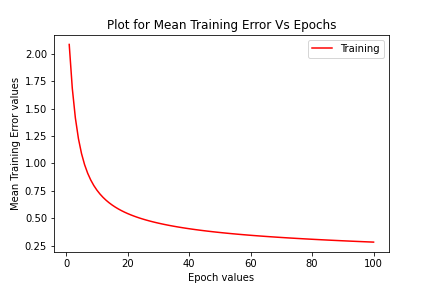

In [11]:
from IPython.display import Image
Image(filename='./figures/lab3.a_MeanTrainingError.png') 

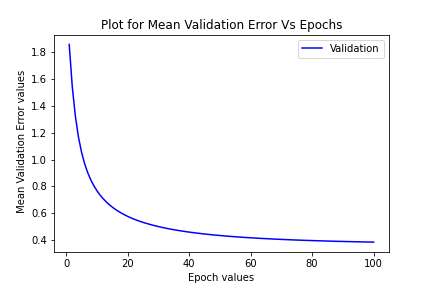

In [12]:
Image(filename='./figures/lab3.a_MeanValidationError.png') 

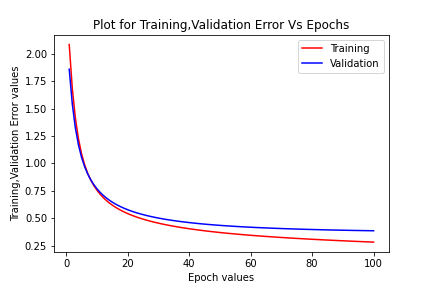

In [13]:
Image(filename='./figures/lab3.a_TrainingAndValidationError.png') 

**OBSERVATIONS ERROR PLOTS**

The error plots for training and validation sets turn out as expected. Both start from high error and the error decreases with each passing epoch. The rate of decrease also decreases as both flattten towards the end. The training plot still does decrease a little as the model continues to update on the training set and each of those updates is more specific to the training set rather than the general instance space. Hence the validation plot flattens earlier.



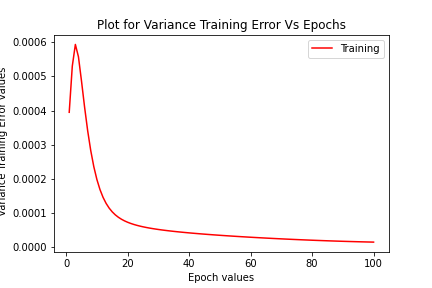

In [14]:
Image(filename='./figures/lab3.a_VarianceTrainingError.png') 

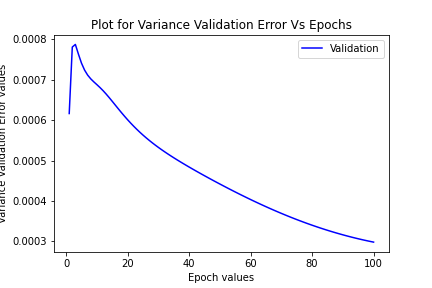

In [15]:
Image(filename='./figures/lab3.a_VarianceValidationError.png') 

**OBSERVATIONS VARIANCE PLOTS**

Note:- In general the variance in the plots is very low. < 10^-3.

Both graphs have some initial variance which peaks and then it starts decreasing.

The initial variance is because of the random initialization that has been done. From these random starting points they make different updates to converge to similar values (trained model). These updates cause the variance to peak and then decrease.

The reason for the variance in general to be very low is the random weight initialization where the initialization is xavier normal. Values with mean 0 and small variance, causing low variance in general.